# The IS-LM-PC model

In [133]:
import numpy as np
import sympy as sm
from scipy import optimize
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import sympy
from IPython.display import display, Markdown

The IS-LM-PC model is a basic macroeconomic model which has replaced the AS-AD model in some newer macroeconomic textbooks. It describes the medium run by combining the IS-LM model with the Phillips curve, thus creating a relation between inflation, unemployment, the output gap, and interest rate policy. 

We define first the **variables**, **parameters** and **equations** of the IS-LM model:
* $Y$ is output (or income) 
* $C$ is consumption
* $c_0$ is the part of consumption that is independent of income
* $c_1$ is the marginal propensity to consume
* $T$ is taxes net of transfers
* $t_0$ is the part of taxes that is independent of income
* $t_1$ is the tax rate on income
* $I$ is investment
* $b_0$ is the part of investment that is independent of income and the interest rate
* $b_1$ is the income sensitivity of investment  
* $b_2$ is the interest rate sensitivity of investment
* $G$ is government spending
* $r$ is the real interest rate

$$
\begin{aligned}
Y=C+I+G\\
C=c_{0}+c_{1}*(Y-t_{0}-t_{1}Y)\\
T=t_{0}+t_{1}Y\\
I=b_{0}+b_{1}Y-b_{2}r\\
\end{aligned}
$$



We start out by defing variables, parameters and the equations for Y, C, T,I symbolically. 

In [134]:
y = sm.symbols('Y')
c = sm.symbols('C')
i = sm.symbols('I')
g = sm.symbols('G')
t = sm.symbols('T')
i_n = sm.symbols('i')
r = sm.symbols('r')
c0 = sm.symbols('c_0')
c1 = sm.symbols('c_1')
t0 = sm.symbols('t_0')
t1 = sm.symbols('t_1')
b0 = sm.symbols('b_0')
b1 = sm.symbols('b_1')
b2 = sm.symbols('b_2')
r_bar = sm.symbols("rbar")

eqC = sm.Eq(c, (c0+c1*(y-t0-t1*y)))
eqT = sm.Eq(t, (t0+t1*y))
eqI = sm.Eq(i, (b0+b1*y-b2*r))

eq_t = t0+t1*y
eq_c = c0+c1*y-eq_t
eq_i = b0+b1*y-b2*r
eq_y = sm.Eq(y, (eq_c+eq_i+g))

We now solve the system of equations to find an expression for Y, which expess the IS curve.

In [135]:

c_func = sm.lambdify((c0,c1,t0,t1,y),sm.solve(eqC,c)[0])
t_func = sm.lambdify((t0,t1,y),sm.solve(eqT,t)[0])
i_func = sm.lambdify((b0,b1,b2,r,y),sm.solve(eqI,i)[0])

y_func = sm.lambdify((c0,c1,t0,t1,b0,b1,b2,r,g),sm.solve((eq_y), y)[0])
y_solve = sm.solve((eq_y), y)[0]
display(Markdown('$IS: Y$ = {}'.format(sympy.latex(y_solve, mode='inline'))))

$IS: Y$ = $\frac{- G - b_{0} + b_{2} r - c_{0} + t_{0}}{b_{1} + c_{1} - t_{1} - 1}$


The central bank sets the interest rate directly, such that the real interest rate equals $r=\bar{r}$. The LM curve in this model is thus simply:

$$
\begin{aligned}
LM: r=\bar{r}\\
\end{aligned}
$$

Combining the IS curve and the LM curve gives the equilibrium level of output:

Thus, we substitute $\bar{r}$ into the expression we found for the IS curve above:

In [136]:
y_equi = y_func(c0,c1,t0,t1,b0,b1,b2,r_bar,g)
display(Markdown('Equilibrium level of output = {}'.format(sympy.latex(y_equi, mode='inline'))))

Equilibrium level of output = $\frac{- G - b_{0} + b_{2} \bar{r} - c_{0} + t_{0}}{b_{1} + c_{1} - t_{1} - 1}$

We then define globals for the parameters (and G) and then solve for the output again

In [137]:
c0 = 100
c1 = 0.8
t0 = 100
t1 = 0.4
b0 = 100
b1 = 0.1
b2 = 10 
g= 500


In [138]:
y_num = y_func(c0,c1,t0,t1,b0,b1,b2,r_bar,g)
display(Markdown('$Y$ = {}'.format(sympy.latex(y_num, mode='inline'))))

$Y$ = $1200.0 - 20.0 \bar{r}$

We plot this in a figure. We also plot the LM curve for $\bar{r}$ = 10. The intersection between the two curves describes the equilibrium.


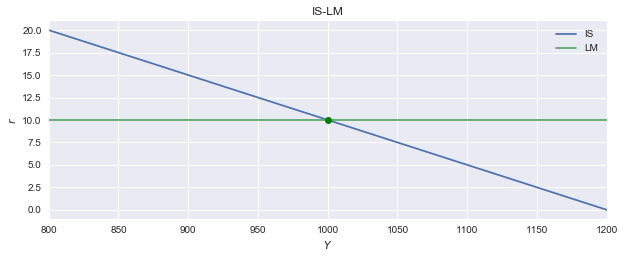

In [139]:
# Number of values in grid
N = 100
 
r_vec = np.linspace(0,20,N)
y_vec = np.empty(N)
rbar_vec = np.ones(N)*10 # interest rate = 10
 
for i,r_bar_plot in enumerate(r_vec):
    r_bar_plot = r_vec[i]
    y_vec[i] = y_func(c0,c1,t0,t1,b0,b1,b2,r_bar_plot,g)

# creates the figures
plt.style.use("seaborn")

#plt.figure()
#plt.subplot(211)
#plt.plot(y_vec,r_vec,'r',y_vec,rbar_vec,'g')

#plt.subplot(212)
#plt.plot(y_vec,pi_vec,'b')

fig = plt.figure(figsize=(10,8))

fig_ISLM = fig.add_subplot(2,1,1)
fig_ISLM.plot(y_vec,r_vec, label='IS')
fig_ISLM.plot(y_vec,rbar_vec, label='LM')
fig_ISLM.set_xlim([800,1200])
plt.legend()

fig_ISLM.set_title('IS-LM')
fig_ISLM.set_xlabel('$Y$')
fig_ISLM.set_ylabel('$r$') 
fig_ISLM.grid(True)
fig_ISLM.plot(1000,10, 'go')


## Adding the Phillips curve

The Phillips curve describes the relationship between the unemployment rate and inflation. We assume the following relationship:
$$
\begin{aligned}
\pi-\pi^{e}=-\alpha*(u-u_{n})\\
\end{aligned}
$$

where
* $\pi$ is inflation
* $\pi^{e}$ is expected inflation
* $u$ is the unemployment rate
* $u_n$ is the natural rate of unemployment (or NAIRU)
* $\alpha$ is some parameter describing the sensitivity of wages to the unemplyment rate


We further assume that inflation expectations are anchored, such that $\pi^{e}$ = $\pi^{a}$. This corresponds to the *classic* or *original* Phillips curve. 

We assume a simple production function with labour as the only input, and one unit of labour producing one unit of output, such that output is equal to employment: 

$$
\begin{aligned}
Y=L*(1-u)\\
Y_n=L*(1-u_n)\\
\end{aligned}
$$

where $L$ is the size of the labour force, and $Y_n$ is the *potential* or *natural* level of output. 

This lets us describe the evolution of inflation as a function of the output gap:

$$
\begin{aligned}
\pi-\pi^{a}=\frac{\alpha}{L}\left(Y-Y_{n}\right)
\end{aligned}
$$

We can thus plot the error in the inflation forecast as a funtion of $Y$, for given values of $\alpha$, the labour force, and potential output.

We define additional symbols and parameters and write up the Phillips curve

In [140]:
y_n = sm.symbols('Y_n')
inf = sm.symbols('pi')
inf_bar = sm.symbols('pibar')
inf_a = sm.symbols('(\pi-\pi^{a})')
alpha = sm.symbols('alpha')
l = sm.symbols('L')

#Eq for the Phillips curve
eq_PC = sm.Eq((inf_a), ((alpha/l)*(y-y_n)))

PC_func = sm.lambdify((inf_a,alpha,l,y_n),sm.solve((eq_PC), y)[0])
PC_solve = sm.solve((eq_PC), y)[0]


print('Thus the phillups curve is given by: ')
display(Markdown('$Y$ = {}'.format(sm.latex(PC_solve, mode='inline'))))

Thus the phillups curve is given by: 


$Y$ = $(\pi-\pi^{a}) L / \alpha + Y_{n}$

we assign alpha=0.5 and the labour force (l) with size 1000, to simplify the expression:

In [141]:
alpha_num=0.5
l_num=1000

PC_num = PC_func(inf_a,alpha,l_num,y_n)
display(Markdown('$Y$ = {}'.format(sm.latex(PC_num, mode='inline'))))

$Y$ = $1000 (\pi-\pi^{a}) / \alpha + Y_{n}$

### Plotting the Phillips curve

For plotting the Phillips curve we set $Y_n$=950

In [142]:
y_n_num=950

Text(1000, 10, 'Eq')

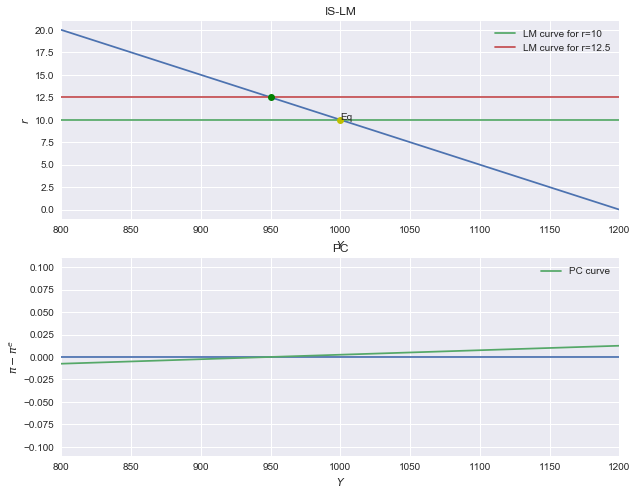

In [156]:
N = 100

# def plot_lines()

r_vec = np.linspace(0,20,N)
y_vec = np.empty(N)
rbar_vec = np.ones(N)*10 # interest rate = 10
rbar_vec2 = np.ones(N)*12.5 # interest rate = 12.5

inf_vec = np.linspace(0.10,-0.10,N)
pi_vec = np.zeros(N) #line where the inflation expectation error is zero
PC_vec = np.empty(N)

for i,r_bar_plot in enumerate(r_vec):
    r_bar_plot = r_vec[i]
    y_vec[i] = y_func(c0,c1,t0,t1,b0,b1,b2,r_bar_plot,g)

for i,inf_err_plot in enumerate(inf_vec):
    inf_err_plot = inf_vec[i]
    PC_vec[i] = PC_func(inf_err_plot,alpha,l_num,y_n_num)

# creates the figures
plt.style.use("seaborn")

fig = plt.figure(figsize=(10,8))

fig_ISLM = fig.add_subplot(2,1,1)
fig_ISLM.plot(y_vec,r_vec) # Plots the IS curve
fig_ISLM.plot(y_vec,rbar_vec,label='LM curve for r=10') # Plots the LM cuve
fig_ISLM.plot(y_vec,rbar_vec2,label='LM curve for r=12.5') 
fig_ISLM.set_xlim([800,1200])
plt.legend()

fig_PC = fig.add_subplot(2,1,2)
fig_PC.plot(y_vec,pi_vec)
fig_PC.plot(PC_vec, inf_vec, label='PC curve')
fig_PC.set_xlim([800,1200])
plt.legend()
 
fig_ISLM.set_title('IS-LM')
fig_ISLM.set_xlabel('$Y$')
fig_ISLM.set_ylabel('$r$')
fig_ISLM.grid(True)

fig_PC.set_title('PC')
fig_PC.set_xlabel('$Y$')
fig_PC.set_ylabel('$\pi-\pi^e$')

fig_ISLM.plot(1000,10,'yo')
fig_ISLM.plot(950,12.5, 'go')
fig_ISLM.annotate('Eq', xy=(1000,10))

The PC curve has been drawn for $Y_n$ = 950. We see from the IS-LM diagram that when the real interest rate is 10 pct., actual output is 1000. This results in a positive output gap, leading to inflation being higher than expected inflation by 2.5 pct. 

The central bank can bring down the inflation rate by increasing the real interest rate. This is drawn as the red line in the IS-LM diagram.

## Maximizing the utility of the Central Bank

We assume that the central bank cares not only about inflation, but also about unemployment. Specifically, we assume that the central bank adjusts the real interest to maximize its utility, given the function
$$
\begin{aligned}
v=f\left(\pi-\pi^{*},\,u_{t}-u_{n}\right)
\end{aligned}
$$

where $\pi^{*}$ is the central banks target rate for inflation. (This rate is not necessarily equal to the anchored inflation expectation, $\bar{\pi}$.)

The central bank faces the constraints set by the relations between unemployment, inflation and the real interest rate by the IS-LM-PC model.

To make these contraints more clear, we express inflation and the difference between the actual and natural rates of unemployment as functions of the real interest rate.

**Firstly** we find an expression for unemployment:

In [144]:
u = sm.symbols('u')
u_n = sm.symbols('u_n')

eq_u = sm.Eq(y, (l*(1-u)))

u_func = sm.lambdify((y,l),sm.solve((eq_u), u)[0])
u_solve = u_func(y_equi,l)
display(Markdown('$u$ = {}'.format(sm.latex(u_solve, mode='inline'))))

$u$ = $\left(L - \frac{- G - b_{0} + b_{2} \bar{r} - c_{0} + t_{0}}{b_{1} + c_{1} - t_{1} - 1}\right) / L$

Given the labour force size of 1000 and the previously used parameters, the expression simplifies to:

In [145]:
u_num = u_func(y_num,l_num)
display(Markdown('$u$ = {}'.format(sm.latex(u_num, mode='inline'))))

$u$ = $0.02 \bar{r} - 0.2$

**Secondly** we find an expression for the inflation

In [146]:
inf_targ = sm.symbols('\pi_{targ}^*')  

eq_pi = sm.Eq((inf-inf_targ), ((alpha/l)*(y-y_n))) 

pi_func = sm.lambdify((inf_targ,alpha,l,y,y_n),sm.solve((eq_pi), inf)[0])
pi_solve = pi_func(inf_targ,alpha,l,y_equi,y_n)
display(Markdown('$\pi$ = {}'.format(sm.latex(pi_solve, mode='inline'))))

$\pi$ = $\left(L \pi_{targ}^* - Y_{n} \alpha + \frac{\alpha \left(- G - b_{0} + b_{2} \bar{r} - c_{0} + t_{0}\right)}{b_{1} + c_{1} - t_{1} - 1}\right) / L$

We assume the inflation target to be an inflation rate of 3%, which implies inf_targ = 0.03. Thus the expression for the inflation rate can be simplified to:

In [147]:
inf_targ_num=0.03
u_n_num=0.05 ### OBS! Denne kan udledes fra Y_n=950 (Men det gør vi ikke)

pi_num = pi_func(inf_targ_num,u_n_num,l_num,y_num,y_n_num)
display(Markdown('$\pi$ = {}'.format(sm.latex(pi_num, mode='inline'))))

$\pi$ = $0.0425 - 0.001 \bar{r}$

**Thirdly** We assume a specific form for the central bank utility function: 

$$
\begin{aligned}
v=-75(\pi-\pi^{*})^2-(u_{t}-u_{n})\\
\end{aligned}
$$

**Now** we can solve the utility function of the Central Bank for the optimal interest rate: 

In [148]:
def utility_CB(r_bar, inf_targ, u_n):
#    return-(-75*(0.175-0.01*r_bar-inf_targ)**2-(0.02*r_bar-0.2-u_n)) 
    return-(2.5*(0.0425-0.01*r_bar-inf_targ)**2-(0.02*r_bar-0.2-u_n)) 
 
def solution(inf_targ, u_n):

    sol = optimize.minimize_scalar(utility_CB,method='bounded',
    bounds=(0,100),args=(inf_targ,u_n))
    r_star = sol.x 
    return r_star
 
i_opt=solution(0.03,0.05)
print(f'The optimal interest rate is {i_opt:.2f}')

The optimal interest rate is 100.00


In [149]:
def solve(c0,c1,t0,t1,b0,b1,b2,r,g,inf_targ,alpha,l,y_n,y_equi):
    
    #solve for the optimal level of output
    y_opt = y_func(c0,c1,t0,t1,b0,b1,b2,r,g)
    
    #solve for the optimal level of inflation
    pi_opt = pi_func(inf_targ,alpha,l,y_opt,y_n)
    
    #solve for the optimal level of unemployment
    u_opt = u_func(y_opt,l)
    
    return y_opt, pi_opt, u_opt


In [150]:
inf_targ = 0.05
alpha = 0.05
l = 1000
y_n = 500
r = i_opt

y_opt,pi_opt,u_opt= solve(c0,c1,t0,t1,b0,b1,b2,r,g,inf_targ,alpha,l,y_n,y_equi)

print(f'The level of output is then {y_opt:.2f}, inflation is {pi_opt:.2f} and the unemployment rate is {u_opt:.2f}')

The level of output is then -800.00, inflation is -0.01 and the unemployment rate is 1.80


In [151]:
# y_opt=y_func(100,0.8,100,0.4,100,0.1,10,solution(0.03,0.05),500)
# pi_opt=pi_func(0.05,0.5,1000,y_opt,950)
# u_opt=u_func(y_opt,1000)
# y_opt, pi_opt, u_opt

# print(f'The level of output is then {y_opt:.2f}, inflation is {pi_opt:.2f} and the unemployment rate is {u_opt:.2f}')

Instead of using the built in optimizer in scipy we can instead use an algorithm

In [152]:
def find_root(x0,f,fp,fpp=None,method='newton',max_iter=10000,tol=1e-8,full_info=False):
    """ find root
        
    Args:
    
        x0 (float): initial value
        f (callable): function
        fp (callable): derivative
        fp (callable): second derivative
        method (str): newton or halley
        max_iter (int): maximum number of iterations
        tol (float): tolerance
        full_info (bool): controls information returned
        
    Returns:
    
        x (float/ndarray): root (if full_info, all x tried)
        i (int): number of iterations used
        fx (ndarray): function values used (if full_info) 
        fpx (ndarray): derivative values used (if full_info)
        fppx (ndarray): second derivative values used (if full_info)
        
    """
    
    # initialize
    x = np.zeros(max_iter)
    fx = np.zeros(max_iter) #function value
    fpx = np.zeros(max_iter)
    fppx = np.zeros(max_iter)
    
    # iterate
    x[0] = x0    #initial guess
    i = 0    
    while True:
        
        # step 2: evaluate function and derivatives
        fx[i] = f(x[i])
        fpx[i] = fp(x[i])
        if method == 'halley':
            fppx[i] = fpp(x[i])
        
        # step 3: check convergence
        if abs(fx[i]) < tol or i >= max_iter:
            break
            
        # step 4: update x
        if method == 'newton':
            x[i+1] = x[i] - fx[i]/fpx[i]
        elif method == 'halley':
            a = fx[i]/fpx[i]
            b = a*fppx[i]/(2*fpx[i])
            x[i+1] = x[i] - a/(1-b)
        
        # step 5: increment counter
        i += 1
        
    # return
    if full_info:
        return x,i,fx,fpx,fppx
    else:
        return x[i],i

In [153]:
# a. function
#f = lambda x: -75*(0.175-0.01*x-inf_targ)**2-(0.02*x-0.2-u_n)
f = lambda x: 0.0075*x**2-0.00125*x-0.238281
u_n = 0.05
inf_targ = 0.03 

# b. numerical derivative (forward)
stepsize = 1e-8
fp_approx = lambda x: (f(x+stepsize)-f(x))/stepsize

x,i = find_root(10,f,fp_approx,method='newton')
print(i,x,f(x))

4 5.7205085640222215 1.0278590756307437e-09


In [154]:
x,i = find_root(14,f,fp_approx,method='newton')
print(i,x,f(x))

5 5.720508551879228 1.0763612223740893e-12


In [155]:
f = lambda x: -0.0075*x**2+0.1975*x-1.32687
fp = lambda x: -0.0075*2*x+0.1975

x,i = find_root(10,f,fp,method='newton')
print(i,x,f(x))

### slet

IndexError: index 10000 is out of bounds for axis 0 with size 10000